In [3]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
DATA_PATH="/home/returaj/Documents/research/offline_safe_rl/weighted_bc"

In [4]:
def convert_to_melt_df(algo, task, type, algo_name):
    # load csv to dataframe
    path = f"{DATA_PATH}/{algo}/{task}/{type}"
    abs_filenames = sorted([osp.join(path, f) for f in os.listdir(path)])
    dfs = []
    for i, f in enumerate(abs_filenames):
        d = pd.read_csv(f)
        if "Wall time" not in d.columns:
            continue 
        d = d.drop(columns=["Wall time"]).rename(columns={"Value": f"seed_{i}", "Step": "epoch"})
        dfs.append(d)
 
    # join dataframes based on epoch
    df = dfs[0]
    for d in dfs[1:]:
        df = df.join(d.set_index("epoch"), on="epoch")
    
    df = pd.melt(df, id_vars=["epoch"], var_name="algo_name", value_name=type)
    df["algo_name"] = algo_name
    return df

In [9]:
task = "Ant_Velocity"
type = "ep_cost"

positive_bc_df = convert_to_melt_df("positive_bc", task, type, "positive_bc")
learned_weighted_bc_df = convert_to_melt_df("positive_learned_cost", task, type, "learned_cost_weighted_bc")
true_weighted_bc_df = convert_to_melt_df("positive_true_cost", task, type, "true_cost_weighted_bc")

In [10]:
d = pd.concat([positive_bc_df, learned_weighted_bc_df, true_weighted_bc_df], ignore_index=True, sort=False)

Text(0.5, 1.0, 'Ant_Velocity')

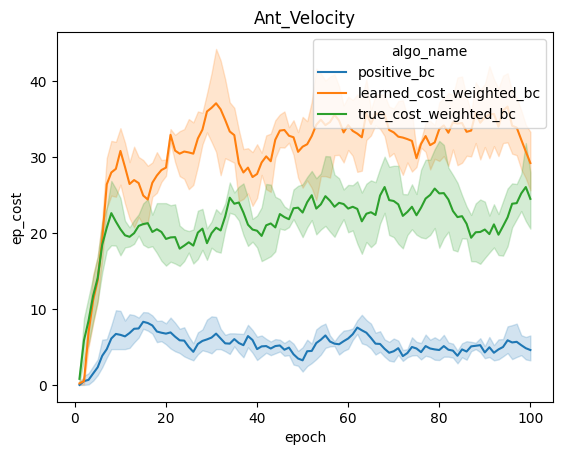

In [11]:
fig, ax = plt.subplots()

sns.lineplot(ax=ax, data=d, x="epoch", y=type, hue="algo_name")
sns.move_legend(ax, "upper right")
ax.set_title(task)

In [43]:
save_fig_path = f"{DATA_PATH}/svg_images/{task}_{type}.svg"
fig.savefig(save_fig_path, format="svg")

In [ ]:
save_fig_path = f"{DATA_PATH}/png_images/{task}_{type}.png"
fig.savefig(save_fig_path)